In [1]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Accessing Realtime Dataset from Twitter

In [2]:
consumer_key_API_key = "2fiDEj23KFEglP2usbSmkTnst"
consumer_secret_API_secret = "lNfevqVhCfd5nNTrRSyMZSiGHtvyL7pFSshI1AZVTQNrHM6R9m"
access_token = "1297897801112793089-vZGTSzgkYoOKNBVykwf7FNyx2JAAa2"
access_token_secret = "nL1GxNRZn5bvAe6BmsPuou5MlP1rb9Bj0LtWHgeKLMblB"

In [3]:
auth = OAuthHandler(consumer_key_API_key,consumer_secret_API_secret)
auth.set_access_token(access_token,access_token_secret)

In [4]:
#import Twitter
api = tweepy.API(auth, wait_on_rate_limit = True)
# name of keyword of intreset post 
posts = api.user_timeline(screen_name = "BillGates", count=300, lang = "en", tweet_mode = "extended")
#check
for tweet in posts[:5]:
    print(tweet.full_text)

I look forward to working with the new administration and leaders on both sides in Congress on getting the surging pandemic under control, engaging partners around the world on issues like poverty and climate change, and addressing issues of inequality and opportunity at home.
Congratulations to President-Elect Biden and Vice President-Elect Harris. Thank you to the election officials and campaign workers who worked tirelessly to ensure a record number of Americans could cast a ballot and have it counted during such an challenging time for our country.
Here in Washington, we always vote by mail. It's a safe and secure way to shape the future of our country. But regardless of whether you vote by mail or in person this year, I hope you plan to make your voice heard. Visit https://t.co/TmsHAC9MGv for more information.
@MohamedBinZayed The UAE is an essential partner in stopping polio in Pakistan. Thank you @MohamedBinZayed for your continued commitment to polio eradication.
For decades, @

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['tweets'])
df.head(5)

,tweets
0,I look forward to working with the new adminis...
1,Congratulations to President-Elect Biden and V...
2,"Here in Washington, we always vote by mail. It..."
3,@MohamedBinZayed The UAE is an essential partn...
4,"For decades, @Rotary has worked tirelessly to ..."


In [6]:
df.shape

(200, 1)

In [7]:
#data cleaning
def cleanTxt(text):
    text = re.sub(r'@[A_Za-z0-9]+','',text)
    text = re.sub(r'@','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    
    return text

df['tweets'] = df['tweets'].apply(cleanTxt)

df

,tweets
0,I look forward to working with the new adminis...
1,Congratulations to President-Elect Biden and V...
2,"Here in Washington, we always vote by mail. It..."
3,MohamedBinZayed The UAE is an essential partne...
4,"For decades, Rotary has worked tirelessly to #..."
...,...
195,US education may be the hardest issue our foun...
196,You could find wild poliovirus in 125 countrie...
197,"The incredible, diverse global partnership tha..."
198,Some of our most vital partners in the fight t...


In [8]:
#adding subjectivity and polarity of each tweet
from textblob import TextBlob
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['tweets'].apply(getsubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df

,tweets,Subjectivity,Polarity
0,I look forward to working with the new adminis...,0.577273,0.268182
1,Congratulations to President-Elect Biden and V...,0.750000,0.250000
2,"Here in Washington, we always vote by mail. It...",0.431250,0.350000
3,MohamedBinZayed The UAE is an essential partne...,0.300000,0.000000
4,"For decades, Rotary has worked tirelessly to #...",0.250000,0.250000
...,...,...,...
195,US education may be the hardest issue our foun...,0.583333,0.333333
196,You could find wild poliovirus in 125 countrie...,0.450000,0.300000
197,"The incredible, diverse global partnership tha...",0.433333,0.333333
198,Some of our most vital partners in the fight t...,0.450000,0.300000


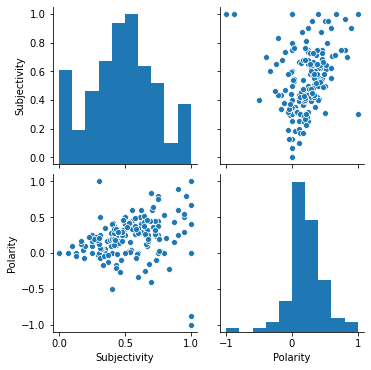

In [9]:
import seaborn as sns
sns.pairplot(df)

In [10]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm 
nlp = spacy.load('en_core_web_sm')
stopwords = list(STOP_WORDS)

## Cleaning of data

In [11]:
df=df.dropna(axis=0,how='any')#removing row having nan values

In [12]:
df.shape

(200, 3)

In [13]:
def remove(tweets):
    return ''.join([i if ord(i)<128 else '' for i in tweets]) 

In [14]:
df["tweets"]=df["tweets"].apply(remove)#non readable text converted into nothing
df["tweets"]=df["tweets"].apply(lambda x:x.lower())#converting into lowercase

In [15]:
df.tweets

0      i look forward to working with the new adminis...
1      congratulations to president-elect biden and v...
2      here in washington, we always vote by mail. it...
3      mohamedbinzayed the uae is an essential partne...
4      for decades, rotary has worked tirelessly to #...
                             ...                        
195    us education may be the hardest issue our foun...
196    you could find wild poliovirus in 125 countrie...
197    the incredible, diverse global partnership tha...
198    some of our most vital partners in the fight t...
199    even a single child paralyzed by polio is one ...
Name: tweets, Length: 200, dtype: object

In [16]:
#removing all punctuationa and extra lines
df["tweets"]=df["tweets"].apply(lambda x:x.replace("."," "))
df["tweets"]=df["tweets"].apply(lambda x:x.replace("\n"," "))
df["tweets"]=df["tweets"].apply(lambda x:x.replace("?"," "))
df["tweets"]=df["tweets"].apply(lambda x:x.replace("!"," "))
df["tweets"]=df["tweets"].apply(lambda x:x.replace('"',' '))
df["tweets"]=df["tweets"].apply(lambda x:x.replace(";"," "))
df["tweets"]=df["tweets"].apply(lambda x:x.replace("#"," "))

In [17]:
df.tweets

0      i look forward to working with the new adminis...
1      congratulations to president-elect biden and v...
2      here in washington, we always vote by mail  it...
3      mohamedbinzayed the uae is an essential partne...
4      for decades, rotary has worked tirelessly to  ...
                             ...                        
195    us education may be the hardest issue our foun...
196    you could find wild poliovirus in 125 countrie...
197    the incredible, diverse global partnership tha...
198    some of our most vital partners in the fight t...
199    even a single child paralyzed by polio is one ...
Name: tweets, Length: 200, dtype: object

In [18]:
df

,tweets,Subjectivity,Polarity
0,i look forward to working with the new adminis...,0.577273,0.268182
1,congratulations to president-elect biden and v...,0.750000,0.250000
2,"here in washington, we always vote by mail it...",0.431250,0.350000
3,mohamedbinzayed the uae is an essential partne...,0.300000,0.000000
4,"for decades, rotary has worked tirelessly to ...",0.250000,0.250000
...,...,...,...
195,us education may be the hardest issue our foun...,0.583333,0.333333
196,you could find wild poliovirus in 125 countrie...,0.450000,0.300000
197,"the incredible, diverse global partnership tha...",0.433333,0.333333
198,some of our most vital partners in the fight t...,0.450000,0.300000


In [19]:
df.tweets[0]

'i look forward to working with the new administration and leaders on both sides in congress on getting the surging pandemic under control, engaging partners around the world on issues like poverty and climate change, and addressing issues of inequality and opportunity at home '

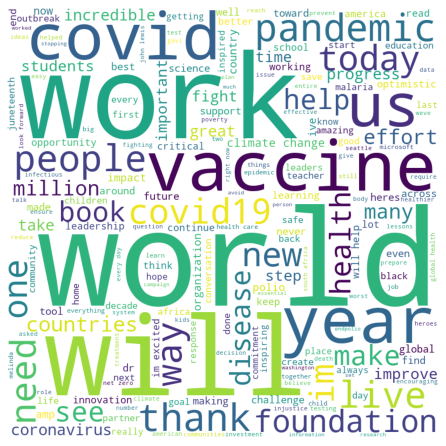

In [20]:
all_words = " ".join( [twts for twts in df["tweets"]])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [21]:
#As you have the polarity scores for each tweet, you can start to compute positive and negative analysis of the tweets. For this, you need to create a function.
def Analysis(score): 
    if score < 0:
        return 0

    elif score>=0:
        return 1

df["Sentiments"] = df["Polarity"].apply(Analysis)

In [22]:
df

,tweets,Subjectivity,Polarity,Sentiments
0,i look forward to working with the new adminis...,0.577273,0.268182,1
1,congratulations to president-elect biden and v...,0.750000,0.250000,1
2,"here in washington, we always vote by mail it...",0.431250,0.350000,1
3,mohamedbinzayed the uae is an essential partne...,0.300000,0.000000,1
4,"for decades, rotary has worked tirelessly to ...",0.250000,0.250000,1
...,...,...,...,...
195,us education may be the hardest issue our foun...,0.583333,0.333333,1
196,you could find wild poliovirus in 125 countrie...,0.450000,0.300000,1
197,"the incredible, diverse global partnership tha...",0.433333,0.333333,1
198,some of our most vital partners in the fight t...,0.450000,0.300000,1


In [23]:
def data_cleaning(sentence):
    doc = nlp(sentence)
    tokens=[]
    for token in doc:
        if token.lemma_ != "-PRON-":
            var = token.lemma_.lower().strip()
        else:
            var = token.lower_
        tokens.append(var)
    clean_tokens = []
    for token in tokens:
        if token not in stopwords:
            clean_tokens.append(token)
    return clean_tokens

In [24]:
df.Sentiments.value_counts()

1    175
0     25
Name: Sentiments, dtype: int64

## Balancing the imbalanced data

In [25]:
tfidf = TfidfVectorizer(tokenizer = data_cleaning)
classifier = LogisticRegression()

In [26]:
x = df["tweets"]
y = df["Sentiments"]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=27,stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(134,) (66,) (134,) (66,)


In [28]:
from sklearn.utils import resample
#concatenate our training data back together
X1=pd.concat([x_train,y_train],axis=1)

#separate minority and majority classes
positive=X1[X1.Sentiments==1]
negative=X1[X1.Sentiments==0]

#upsample minority
neg_sample=resample(negative,replace=True,#sample with replacement
                    n_samples=len(positive),#match no. in majority sentiments
                    random_state=27)#reproducible results
#combine majority and negative minority
sample=pd.concat([positive,neg_sample])

#check new counts
sample.Sentiments.value_counts()

1    117
0    117
Name: Sentiments, dtype: int64

In [29]:
sample.shape

(234, 2)

In [30]:
sample.head()

,tweets,Sentiments
91,here are five books to read this summer if you...,1
108,on worldhealthday and every day i want to t...,1
114,all the work that rich countries are doing now...,1
194,were getting closer to having a blood test for...,1
187,i really enjoyed sitting down with to talk ab...,1


## Applying ML algorithms

### 1. Logistic Regresssion

In [31]:
store = pd.DataFrame(columns=["model","Accuracy_Score"])
store

,model,Accuracy_Score


In [32]:
X = sample["tweets"]
Y = sample["Sentiments"]

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=27,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(156,) (78,) (156,) (78,)


In [34]:
clf = Pipeline([('tfidf',tfidf),('clf',classifier)])

In [35]:
clf.fit(X_train,Y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function data_cleaning at 0x00000289AFAB5AF0>)),
                ('clf', LogisticRegression())])

In [36]:
y_pred = clf.predict(X_test)

In [37]:
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.9615384615384616

In [38]:
matrix = confusion_matrix(Y_test,y_pred)
matrix

array([[39,  0],
       [ 3, 36]], dtype=int64)

In [39]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.92      0.96        39

    accuracy                           0.96        78
   macro avg       0.96      0.96      0.96        78
weighted avg       0.96      0.96      0.96        78



In [40]:
print(y_pred)

[1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0
 0 1 1 1]


In [41]:
print(Y_test)

65     1
176    1
33     1
84     0
194    1
      ..
166    0
20     0
179    1
149    1
168    1
Name: Sentiments, Length: 78, dtype: int64


### 2. RandomForest Classifier

In [42]:
classifier = RandomForestClassifier()

In [43]:
clf1 = Pipeline([('tfidf',tfidf),('clf',classifier)])

In [44]:
clf1.fit(X_train,Y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function data_cleaning at 0x00000289AFAB5AF0>)),
                ('clf', RandomForestClassifier())])

In [45]:
y_pred1 = clf1.predict(X_test)

In [46]:
accuracy1=accuracy_score(Y_test,y_pred1)
accuracy1

0.9487179487179487

In [47]:
confusion_matrix(Y_test,y_pred1)

array([[39,  0],
       [ 4, 35]], dtype=int64)

In [48]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        39
           1       1.00      0.90      0.95        39

    accuracy                           0.95        78
   macro avg       0.95      0.95      0.95        78
weighted avg       0.95      0.95      0.95        78



In [49]:
print(y_pred1)

[1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0
 0 1 1 1]


In [50]:
print(Y_test)

65     1
176    1
33     1
84     0
194    1
      ..
166    0
20     0
179    1
149    1
168    1
Name: Sentiments, Length: 78, dtype: int64


### 3. Support Vector Machine

In [51]:
classifier = svm.SVC(kernel='linear', C=1,gamma='auto')

In [52]:
clf2 = Pipeline([('tfidf',tfidf),('clf',classifier)])

In [53]:
clf2.fit(X_train,Y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function data_cleaning at 0x00000289AFAB5AF0>)),
                ('clf', SVC(C=1, gamma='auto', kernel='linear'))])

In [54]:
y_pred2 = clf2.predict(X_test)

In [55]:
accuracy2 = accuracy_score(Y_test,y_pred2)
accuracy2

0.9487179487179487

In [56]:
confusion_matrix(Y_test,y_pred2)

array([[39,  0],
       [ 4, 35]], dtype=int64)

In [57]:
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        39
           1       1.00      0.90      0.95        39

    accuracy                           0.95        78
   macro avg       0.95      0.95      0.95        78
weighted avg       0.95      0.95      0.95        78



In [58]:
y_pred2

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [59]:
Y_test

65     1
176    1
33     1
84     0
194    1
      ..
166    0
20     0
179    1
149    1
168    1
Name: Sentiments, Length: 78, dtype: int64

# Decission Tree Classifier

In [61]:
from sklearn import tree

In [63]:
classifier = tree.DecisionTreeClassifier()

In [64]:
clf3 = Pipeline([('tfidf',tfidf),('clf',classifier)])

In [65]:
clf3.fit(X_train,Y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function data_cleaning at 0x00000289AFAB5AF0>)),
                ('clf', DecisionTreeClassifier())])

In [66]:
y_pred3 = clf3.predict(X_test)

In [67]:
accuracy3 = accuracy_score(Y_test,y_pred3)
accuracy3

0.8974358974358975

In [69]:
confusion_matrix(Y_test,y_pred3)

array([[39,  0],
       [ 8, 31]], dtype=int64)

In [70]:
y_pred3

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [71]:
Y_test

65     1
176    1
33     1
84     0
194    1
      ..
166    0
20     0
179    1
149    1
168    1
Name: Sentiments, Length: 78, dtype: int64

# Accuracy Of All Models 

In [72]:
store["model"]=["Logistic Regression","Random Forest Classifier","SVM","Decission Tree Classifier"]
store["Accuracy_Score"]=[accuracy,accuracy1,accuracy2,accuracy3]
store

,model,Accuracy_Score
0,Logistic Regression,0.961538
1,Random Forest Classifier,0.948718
2,SVM,0.948718
3,Decission Tree Classifier,0.897436
